# <div style="text-align: center">Advanced Matrix Algebra and Applications - NMF</div>   

## Toy Example : Collaborative Filtering

In [1]:
import numpy as np #module in which most of the operations of our interest are defined
import matplotlib.pyplot as plt #for plotting
from math import * #module for exp,log,power, trig functions etc...
from numpy.linalg import * #module with linear algebraic functions
import scipy.linalg as sp
from sklearn.decomposition import *

In [2]:
X = np.array([[4.8 , 4 , 0 , 4.9 , 2.1],
             [4.7 , 4.1 , 3.5 , 4 , 4.4],
             [0 , 4.8 , 4 , 0 , 4.7],
              [4.6 , 0 , 0 , 0 , 0],
              [0 , 4.9 , 0 , 0 , 0],
              [0 , 4.7 , 4.6 , 4.4 , 4.9],
              [ 2.1 , 1.5 , 2.5 , 0 , 0]])
X

array([[4.8, 4. , 0. , 4.9, 2.1],
       [4.7, 4.1, 3.5, 4. , 4.4],
       [0. , 4.8, 4. , 0. , 4.7],
       [4.6, 0. , 0. , 0. , 0. ],
       [0. , 4.9, 0. , 0. , 0. ],
       [0. , 4.7, 4.6, 4.4, 4.9],
       [2.1, 1.5, 2.5, 0. , 0. ]])

In [6]:

nmf = NMF(2)
W=np.around(nmf.fit_transform(X),3)
H =np.around(nmf.components_,3)

In [7]:
W #new basis

array([[0.971, 1.929],
       [1.699, 1.626],
       [1.872, 0.   ],
       [0.   , 1.317],
       [0.77 , 0.   ],
       [2.219, 0.232],
       [0.452, 0.543]])

In [8]:
H

array([[0.   , 2.53 , 1.898, 1.09 , 2.217],
       [2.853, 0.312, 0.   , 1.314, 0.045]])

In [9]:
import sklearn
Sim =np.around(sklearn.metrics.pairwise.cosine_similarity(W, Y=None, dense_output=True),3) 
Sim #similarity

array([[1.   , 0.942, 0.45 , 0.893, 0.45 , 0.54 , 0.974],
       [0.942, 1.   , 0.722, 0.691, 0.722, 0.79 , 0.994],
       [0.45 , 0.722, 1.   , 0.   , 1.   , 0.995, 0.64 ],
       [0.893, 0.691, 0.   , 1.   , 0.   , 0.104, 0.769],
       [0.45 , 0.722, 1.   , 0.   , 1.   , 0.995, 0.64 ],
       [0.54 , 0.79 , 0.995, 0.104, 0.995, 1.   , 0.716],
       [0.974, 0.994, 0.64 , 0.769, 0.64 , 0.716, 1.   ]])

In [10]:
np.around(sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True),3)

array([[1.   , 0.888, 0.453, 0.584, 0.487, 0.663, 0.545],
       [0.888, 1.   , 0.748, 0.505, 0.441, 0.861, 0.741],
       [0.453, 0.748, 1.   , 0.   , 0.614, 0.879, 0.612],
       [0.584, 0.505, 0.   , 1.   , 0.   , 0.   , 0.584],
       [0.487, 0.441, 0.614, 0.   , 1.   , 0.505, 0.417],
       [0.663, 0.861, 0.879, 0.   , 0.505, 1.   , 0.555],
       [0.545, 0.741, 0.612, 0.584, 0.417, 0.555, 1.   ]])



## Low Rank Matrix Completion for the Collaborative Filtering Example

In [36]:
import numpy as np
from matrix_completion import svt_solve, calc_unobserved_rmse

m,n = X.shape

mask = np.ones((m,n))

for i in range(m):
    for j in range(n):
        
        if X[i,j] == 0:
            mask[i,j] = 0

X_hat = svt_solve(X, mask)

print('Completed matrix : \n {}'.format(X_hat))



Completed matrix : 
 [[4.8184567  4.03326378 1.99607896 4.99499067 2.05781387]
 [4.74072707 4.12697082 3.52849653 3.97212322 4.41841443]
 [2.19939051 4.83739113 4.00604199 3.06518217 4.7684133 ]
 [4.63767663 1.29332162 1.17415009 2.91910116 1.57009675]
 [1.38455634 4.97731892 1.90328043 2.7235949  2.63838441]
 [3.68723158 4.71672012 4.63546363 4.44167682 4.9179704 ]
 [2.0917619  1.48724179 2.52793371 1.97835168 2.57701634]]


In [37]:
X

array([[4.8, 4. , 0. , 4.9, 2.1],
       [4.7, 4.1, 3.5, 4. , 4.4],
       [0. , 4.8, 4. , 0. , 4.7],
       [4.6, 0. , 0. , 0. , 0. ],
       [0. , 4.9, 0. , 0. , 0. ],
       [0. , 4.7, 4.6, 4.4, 4.9],
       [2.1, 1.5, 2.5, 0. , 0. ]])

## Document Classification

In [11]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck <L.J.Buitinck@uva.nl>
# License: BSD 3 clause

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

t0 = time()
print("Loading dataset and extracting TF-IDF features...")
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                             stop_words='english')
tfidf = vectorizer.fit_transform(dataset.data[:n_samples])
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Loading dataset and extracting TF-IDF features...
done in 287.220s.
Fitting the NMF model with n_samples=2000 and n_features=1000...
done in 288.386s.
Topic #0:
just people don think like know say did make really time way ve right sure good going want got wrong

Topic #1:
windows use using window dos program application os drivers software help screen running ms code motif pc work ve mode

Topic #2:
god jesus bible faith does christian christians christ believe life heaven sin lord church religion true mary human belief love

Topic #3:
thanks know does mail advance hi info interested anybody email like looking help appreciated card information list send need post

Topic #4:
car new 00 bike 10 price space cars power sale good year engine years used cost miles condition great 000

Topic #5:
edu soon com send university internet ftp mail mit information article cc pub address hope program email mac blood contact

Topic #6:
file problem files format ftp win space sound read pub available p

In [17]:
nmf.fit_transform(tfidf).shape

(2000, 10)

In [18]:
nmf.fit_transform(tfidf)[0]

array([0.04683791, 0.        , 0.0043635 , 0.        , 0.        ,
       0.        , 0.00425987, 0.        , 0.00996014, 0.01956568])

In [20]:
nmf.components_.shape

(10, 1000)

## Image Processing

In [38]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Automatically created module for IPython interactive environment
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Jaiprakash R\scikit_learn_data
Dataset consists of 400 faces


In [24]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [25]:
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),
]

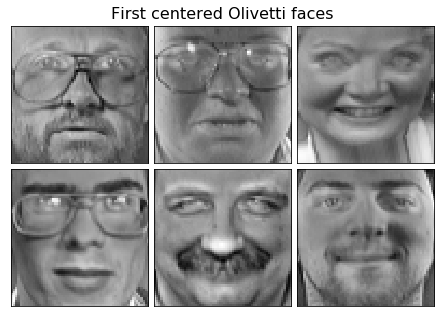

In [26]:
# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# #############################################################################

Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.905s
Extracting the top 6 Non-negative components - NMF...
done in 0.650s


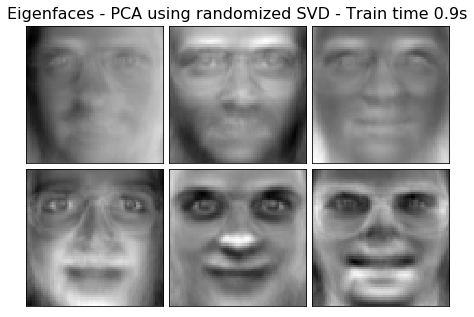

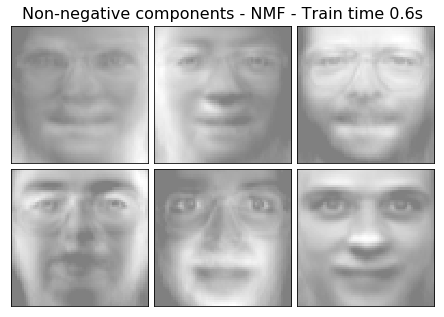

In [27]:
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0):  # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()